<a href="https://colab.research.google.com/github/Arezoo1344/cnn_project_for_arezoo/blob/main/CNN_project_40223794_ArezooMaghsoudpour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import numpy as np
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test/ 255.0
y_train = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)
print(y_train[0 : 3, :])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [7]:
print(f'Total data for traing: {x_train.shape[0]}, Train X shape: {x_train.shape}, Train y shape: {y_train.shape}')
print(f'Total data for test: {x_test.shape[0]}, Test X shape: {x_test.shape}, Test y shape: {y_test.shape}')

Total data for traing: 50000, Train X shape: (50000, 32, 32, 3), Train y shape: (50000, 10)
Total data for test: 10000, Test X shape: (10000, 32, 32, 3), Test y shape: (10000, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

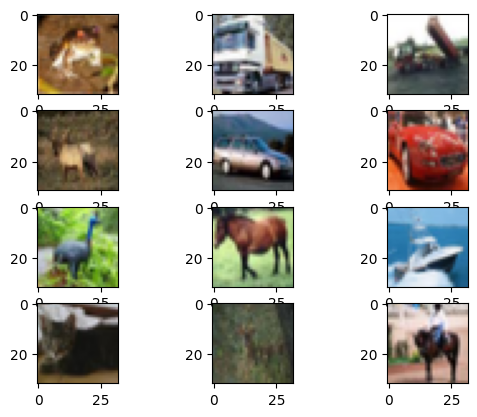

In [8]:
import matplotlib.pyplot as plt
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(x_train[i])
plt.show

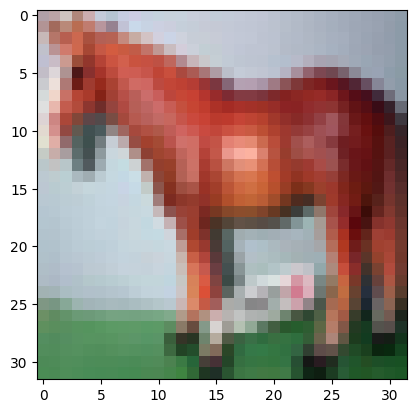

In [9]:
i = 318
plt.imshow(x_train[i])
plt.show()

In [10]:
datAGM = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)
datAGM.fit(x_train)
def Cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        layers.Conv2D(1024, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(1024, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = Cnn_model()
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
batch_size = 32
epochs = 120
history = model.fit(datAGM.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test_onehot))
test_loss, test_acc = model.evaluate(x_test, y_test_onehot, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 256)         │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 16, 16, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 1024)          │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 8, 8, 1024)          │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 1024)          │       9,438,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 8, 8, 1024)          │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 4, 4, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 24,048,810 (91.74 MB)

 Trainable params: 24,041,450 (91.71 MB)

 Non-trainable params: 7,360 (28.75 KB)

Epoch 1/120
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 70ms/step - accuracy: 0.2746 - loss: 2.0551 - val_accuracy: 0.4064 - val_loss: 1.7654
Epoch 2/120
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.4369 - loss: 1.5552 - val_accuracy: 0.4216 - val_loss: 1.8396
Epoch 3/120
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 55ms/step - accuracy: 0.5187 - loss: 1.3424 - val_accuracy: 0.6030 - val_loss: 1.1647
Epoch 4/120
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.5816 - loss: 1.1970 - val_accuracy: 0.6282 - val_loss: 1.1104
Epoch 5/120
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.6219 - loss: 1.0877 - val_accuracy: 0.6791 - val_loss: 0.9704
Epoch 6/120
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 57ms/step - accuracy: 0.6571 - loss: 0.9979 - val_accuracy: 0.7440 - val_loss: 0.7445
Epoch 7/120
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 60ms/step - accuracy: 0.6806 - loss: 0.9257 - val_accuracy: 0.6775 - val_loss: 0.9830
Epoch 8/120
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 57ms/step - accura

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1000
           1       0.95      0.96      0.96      1000
           2       0.93      0.90      0.91      1000
           3       0.92      0.77      0.84      1000
           4       0.94      0.92      0.93      1000
           5       0.90      0.88      0.89      1000
           6       0.86      0.98      0.92      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.94      0.95      1000
           9       0.87      0.97      0.92      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



<Axes: >

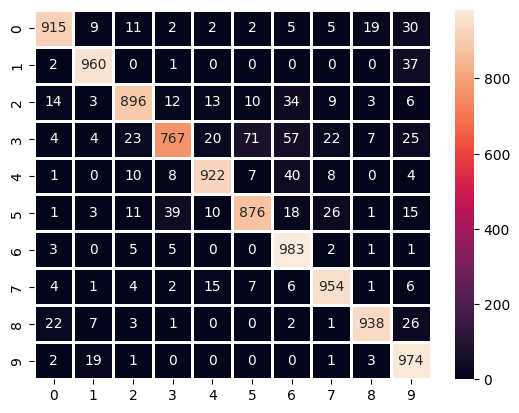

In [11]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

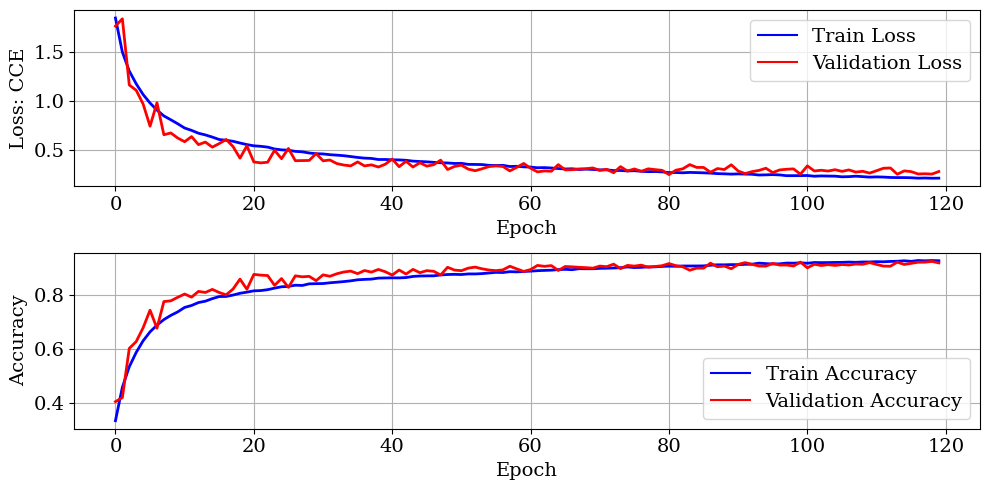

In [12]:
import matplotlib.pyplot as plt
import matplotlib

# Set the font family to serif
matplotlib.rcParams['font.family'] = 'serif'

# Set the desired fontsize
fontsize = 14

train_loss = history.history['loss']
val_loss = history.history['val_loss']


# Create a figure with two subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Plot the train and validation loss in the top subplot
axs[0].plot(train_loss, label='Train Loss', color ='b')
axs[0].plot(val_loss, label='Validation Loss', color='r')

# Set the axis labels and title for the top subplot
axs[0].set_xlabel('Epoch', fontsize=fontsize)
axs[0].set_ylabel('Loss: CCE', fontsize=fontsize)
#axs[0].set_title('Training and Validation Loss', fontsize=fontsize)

# Set the legend and grid for the top subplot
axs[0].legend(fontsize=fontsize)
axs[0].grid(True)

# Set the tick labels fontsize for the top subplot
axs[0].tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the top subplot
axs[0].lines[0].set_linewidth(2)
axs[0].lines[1].set_linewidth(2)



train_acc =history.history['accuracy']
val_acc = history.history['val_accuracy']


# Plot the train and validation accuracy in the bottom subplot
axs[1].plot(train_acc, label='Train Accuracy', color ='b')
axs[1].plot(val_acc, label='Validation Accuracy', color='r')

# Set the axis labels and title for the bottom subplot
axs[1].set_xlabel('Epoch', fontsize=fontsize)
axs[1].set_ylabel('Accuracy', fontsize=fontsize)

# Set the legend and grid for the bottom subplot
axs[1].legend(fontsize=fontsize)
axs[1].grid(True)

# Set the tick labels fontsize for the bottom subplot
axs[1].tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the bottom subplot
axs[1].lines[0].set_linewidth(2)
axs[1].lines[1].set_linewidth(2)

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()

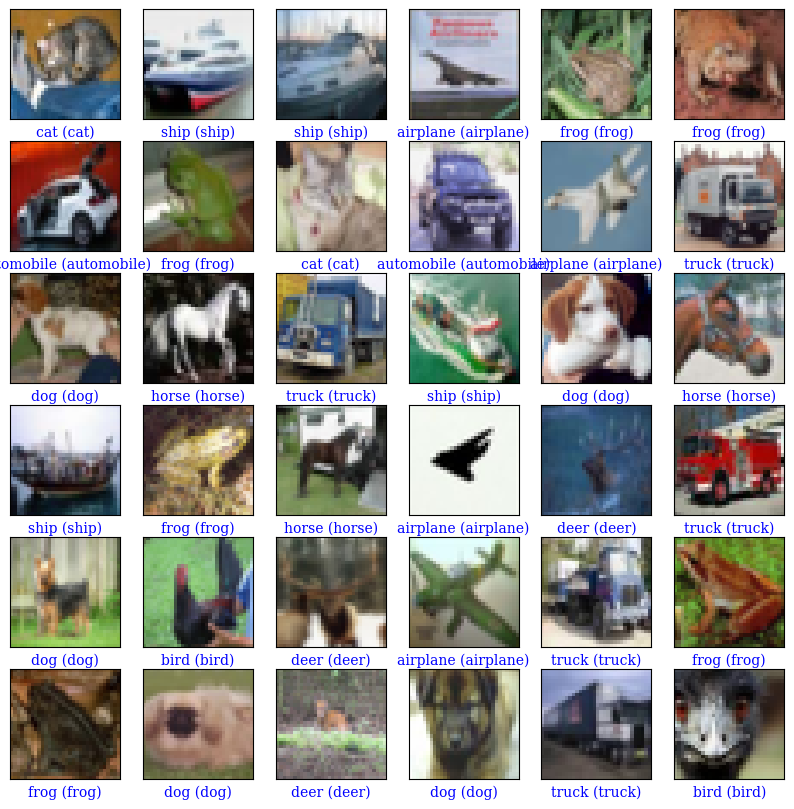

In [13]:
cifar_classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(32,32,3),cmap=plt.cm.binary)
    predicted_label=np.argmax(y_pred[i])
    true_label=np.argmax(y_test_onehot[i])
    if predicted_label==true_label:
        color ='blue'
    else:
        color='red'
    plt.xlabel("{} ({})".format(cifar_classes[predicted_label],cifar_classes[true_label]),color=color)
plt.show()

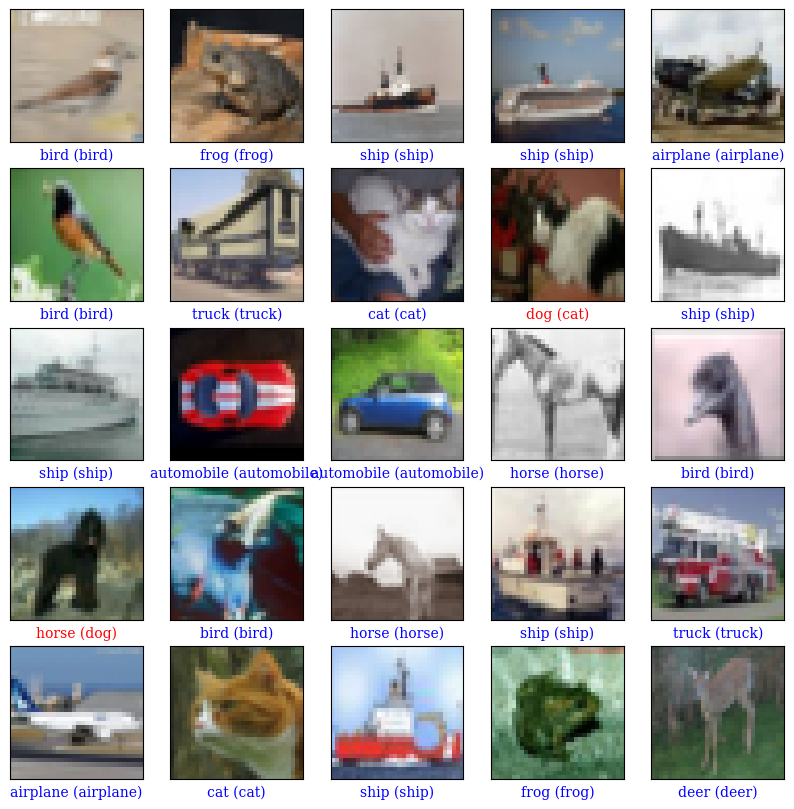

In [14]:
cifar_classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i+70].reshape(32,32,3),cmap=plt.cm.binary)
    predicted_label=np.argmax(y_pred[i+70])
    true_label=np.argmax(y_test_onehot[i+70])
    if predicted_label==true_label:
        color ='blue'
    else:
        color='red'
    plt.xlabel("{} ({})".format(cifar_classes[predicted_label],cifar_classes[true_label]),color=color)
plt.show()